In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
#Read and understand the data
#Clean the data
#Preprepate the data for modelling
#Modelling
#Final analysis and reco#

In [3]:
retail_df=pd.read_csv("D:Online+Retail.csv",sep=",",encoding="ISO-8859-1",header=0)

In [4]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [5]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
round(100*(retail_df.isnull().sum())/len(retail_df),2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [7]:
#drop rows
retail_df= retail_df.dropna()
retail_df.shape


(406829, 8)

In [8]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [9]:
# R= recency(recent customer)
# F= Frequency(no of transection)
# M= Monitary( total amount contributed by customer)

In [10]:
#creat new column amount
retail_df["amount"]=retail_df["Quantity"]*retail_df["UnitPrice"]
retail_df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [11]:
#monetary
grouped_df=retail_df.groupby("CustomerID")["amount"].sum()
grouped_df=grouped_df.reset_index()
grouped_df.head()

,CustomerID,amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [12]:
frequency=retail_df.groupby("CustomerID")["InvoiceNo"].count()
frequency=frequency.reset_index()
frequency.columns=["CustomerID","frequency"]
frequency.head()

,CustomerID,frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [13]:
grouped_df=pd.merge(grouped_df,frequency,on="CustomerID",how="inner")
grouped_df.head()

,CustomerID,amount,frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [14]:
# recency
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [15]:
retail_df["InvoiceDate"]=pd.to_datetime(retail_df["InvoiceDate"],format="%d-%m-%Y %H:%M")

In [16]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   amount       406829 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.0+ MB


In [17]:
#compute the max date
max_date=max(retail_df["InvoiceDate"])
max_date

Timestamp('2011-12-09 12:50:00')

In [18]:
#compute the diff
retail_df["diff"]=max_date-retail_df["InvoiceDate"]
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [19]:

last_purchase=retail_df.groupby("CustomerID")["diff"].min()
last_purchase=last_purchase.reset_index()  
last_purchase.head()

,CustomerID,diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [20]:
#merge
grouped_df=pd.merge(grouped_df,last_purchase,on="CustomerID",how="inner")
grouped_df.columns=["CustomerID","amount","frequency","recency"]
grouped_df.head()

,CustomerID,amount,frequency,recency
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00


In [21]:
#number of days only
grouped_df["recency"]=grouped_df["recency"].dt.days
grouped_df.head()

,CustomerID,amount,frequency,recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


{'whiskers': [<matplotlib.lines.Line2D at 0x24730063b88>,
 'caps': [<matplotlib.lines.Line2D at 0x2473007efc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2473006bf88>],
 'medians': [<matplotlib.lines.Line2D at 0x2473008bc48>],
 'fliers': [<matplotlib.lines.Line2D at 0x2473007a948>],
 'means': []}

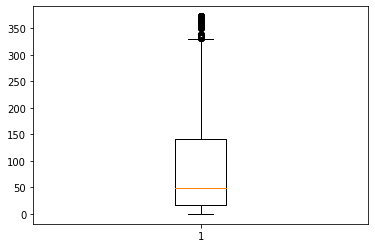

In [22]:
#outlier treatment
plt.boxplot(grouped_df["recency"])

In [23]:
# two type of out lier
# 1 statical
# 2 domain

In [24]:
# Removing statical outlier
Q1=grouped_df.amount.quantile(0.05)
Q3=grouped_df.amount.quantile(0.95)
IQR=Q3-Q1
grouped_df=grouped_df[(grouped_df.amount >= Q1-1.5*IQR) & (grouped_df.amount <= Q3+1.5*IQR)]


#outlier treating for recency
Q1=grouped_df.recency.quantile(0.05)
Q3=grouped_df.recency.quantile(0.95)
IQR=Q3-Q1
grouped_df=grouped_df[(grouped_df.recency>=Q1-1.5*IQR) & (grouped_df.recency<=Q3+1.5*IQR)]

#outlier treating for frequency
Q1=grouped_df.frequency.quantile(0.05)
Q3=grouped_df.frequency.quantile(0.95)
IQR=Q3-Q1
grouped_df=grouped_df[(grouped_df.frequency>=Q1-1.5*IQR) & (grouped_df.frequency<=Q3+1.5*IQR)]



In [25]:
#rescaling
rfm_df=grouped_df[["amount","frequency","recency"]]
rfm_df.head()                  

,amount,frequency,recency
0,0.00,2,325
1,4310.00,182,1
2,1797.24,31,74
3,1757.55,73,18
4,334.40,17,309


In [26]:
#instantiate
scaler=StandardScaler()

#fit transform
rfm_df.scaled=scaler.fit_transform(rfm_df)
rfm_df.scaled.shape


C:\Users\Acer\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """


(4293, 3)

In [27]:

rfm_df.scaled=pd.DataFrame(rfm_df.scaled)
rfm_df.scaled.columns=["amount","frequency","recency"]
rfm_df.scaled.head()

,amount,frequency,recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


In [28]:
#Modelling


In [29]:
#k means with some arbitrary k
kmeans=KMeans(n_clusters=4,max_iter=50)
kmeans.fit(rfm_df.scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [30]:
kmeans.labels_

array([1, 0, 2, ..., 1, 2, 2])

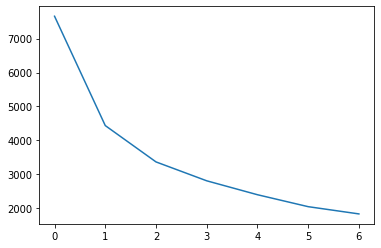

In [31]:
#finding the optimal number of cluster
#elbow curve/SSD
ssd=[]
range_n_clusters=[2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans=KMeans(n_clusters=num_clusters,max_iter=50)
    kmeans.fit(rfm_df.scaled)
    ssd.append( kmeans.inertia_)
#plot ssd for each n_cluster
plt.plot(ssd)

In [32]:
#silhouette analysis
range_n_clusters=[2,3,4,5,6,7,8]

for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans=KMeans(n_clusters=num_clusters,max_iter=50)
    kmeans.fit(rfm_df.scaled)
    cluster_labels=kmeans.labels_
    #silhouette score
    silhouette_avg=silhouette_score(rfm_df.scaled,cluster_labels)
    print("for n_clusters={0},the silhouette score is {1}".format (num_clusters,silhouette_avg) )


for n_clusters=2,the silhouette score is 0.5415858652525395
for n_clusters=3,the silhouette score is 0.5084896296141937
for n_clusters=4,the silhouette score is 0.4800058803219165
for n_clusters=5,the silhouette score is 0.46413788559626845
for n_clusters=6,the silhouette score is 0.41753051875511704
for n_clusters=7,the silhouette score is 0.4167551985657006
for n_clusters=8,the silhouette score is 0.41258830112105616


In [33]:
#final model k=3

In [34]:
kmeans=KMeans(n_clusters=3,max_iter=50)
kmeans.fit(rfm_df.scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [35]:
kmeans.labels_

array([0, 1, 2, ..., 0, 2, 2])

In [36]:
grouped_df["cluster_id"]=kmeans.labels_
grouped_df.head()

,CustomerID,amount,frequency,recency,cluster_id
0,12346.0,0.00,2,325,0
1,12347.0,4310.00,182,1,1
2,12348.0,1797.24,31,74,2
3,12349.0,1757.55,73,18,2
4,12350.0,334.40,17,309,0


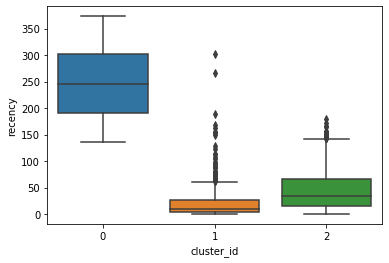

In [37]:
#plot
sns.boxplot(x="cluster_id",y="recency",data=grouped_df)